# AllLife Bank Personal Loan Campaign

## Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.



## Objective
* To predict whether a liability customer will buy personal loans.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Loading libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# For pandas profiling
from pandas_profiling import ProfileReport

## Import Dataset

In [2]:
Loan = pd.read_csv("Loan_Modelling.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* Personal_Loan, Education, Securities_Account, CD_Account, Online, CreditCard: These variables are categorical and should be treated as such.
* There are no null values in the data.

In [8]:
## Converting the data type of categorical features to 'category'
cat_cols = ['Education','Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


### Summary of the dataset.

In [9]:
data.describe().T

count          mean          std      min       25%      50%  \
ID          5000.0   2500.500000  1443.520003      1.0   1250.75   2500.5   
Age         5000.0     45.338400    11.463166     23.0     35.00     45.0   
Experience  5000.0     20.104600    11.467954     -3.0     10.00     20.0   
Income      5000.0     73.774200    46.033729      8.0     39.00     64.0   
ZIPCode     5000.0  93169.257000  1759.455086  90005.0  91911.00  93437.0   
Family      5000.0      2.396400     1.147663      1.0      1.00      2.0   
CCAvg       5000.0      1.937938     1.747659      0.0      0.70      1.5   
Mortgage    5000.0     56.498800   101.713802      0.0      0.00      0.0   

                 75%      max  
ID           3750.25   5000.0  
Age            55.00     67.0  
Experience     30.00     43.0  
Income         98.00    224.0  
ZIPCode     94608.00  96651.0  
Family          3.00      4.0  
CCAvg           2.50     10.0  
Mortgage      101.00    635.0

* ID: The ID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
* Age: Average age of customers is 45 years, age of customers has a wide range from 23 to 67 years. 
* Experience: A negative experience of -3 seems to be a data entry error. The average working experience of the customers is ~20 years, we have some highly experienced working professions in the data.
* Income: Average income of customers is 73k dollars. Income has a wide range from 8k dollars to 224k dollars, there's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in the data. 
* ZIPCode: ZIPCode seems to have many unique values, we will see if some insights can be extracted from it.
* Family:  75% of the customers have 3 or less than 3 dependents.
* CCAvg: Some customers have average spending of 0 dollars a month. There's a huge difference in the 75th percentile and maximum value of the average spendings indicating that there might be outliers present.
* Mortgage: Average mortgage value of house of customers is ~56k dollars. Many customers do not have any mortgages.

In [10]:
data = data.drop(['ID'], axis=1)

In [11]:
data.describe(include=['category']).T

count  unique  top  freq
Education            5000       3    1  2096
Personal_Loan        5000       2    0  4520
Securities_Account   5000       2    0  4478
CD_Account           5000       2    0  4698
Online               5000       2    1  2984
CreditCard           5000       2    0  3530

In [12]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************


* Education: Most of the customers are Graduates.
* Personal_Loan: Most of the customers didn't accept the loan in the previous campaign.
* Securities_Account: Most of the customers do not have a Securities Account.
* CD_Account: Most of the customers do not have a CD Account.
* Online: Most customers do not use internet banking facilities.
* CreditCard: Most customers do not use credit cards from any other bank.

## EDA

## Univariate analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

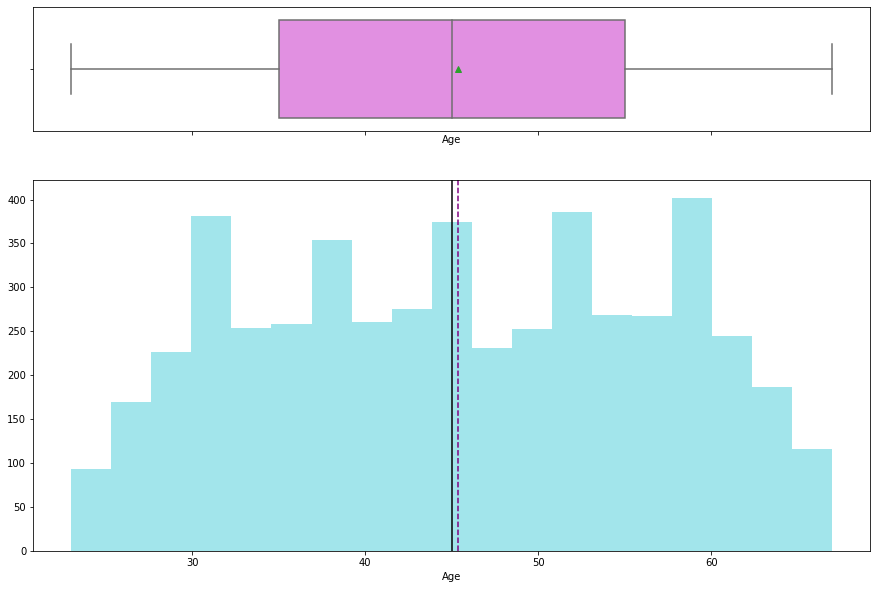

In [14]:
histogram_boxplot(data['Age'])

* The distribution of Age is fairly symmetrical about the mean and the median. 
* The mean and median age of customers is almost equal to ~45 years.

### Observations on Experience

* Treating the negative values of Experience: We assume that these negative signs here are data input errors, so we will replace them with positive signs

In [15]:
data[data['Experience']<0]['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [16]:
data['Experience'].replace(-1,1,inplace=True)
data['Experience'].replace(-2,2,inplace=True)
data['Experience'].replace(-3,3,inplace=True)

In [17]:
 data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

* Minimum value of experience in 0 now.

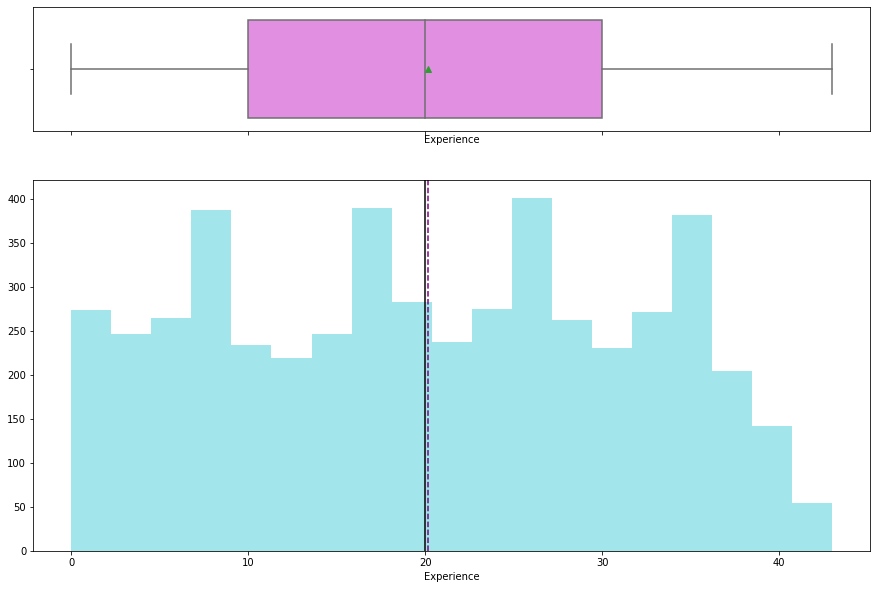

In [18]:
histogram_boxplot(data['Experience'])

* The Experience variable seems to be fairly symmetrical about mean and median.
* The distribution of Experience looks like the distribution of Age, it would be interesting to see if there's a correlation between them.
* The mean and median experience of customers is equal to ~20 years.
* Some customers have experience of more than 40 years.


### Observations on Income

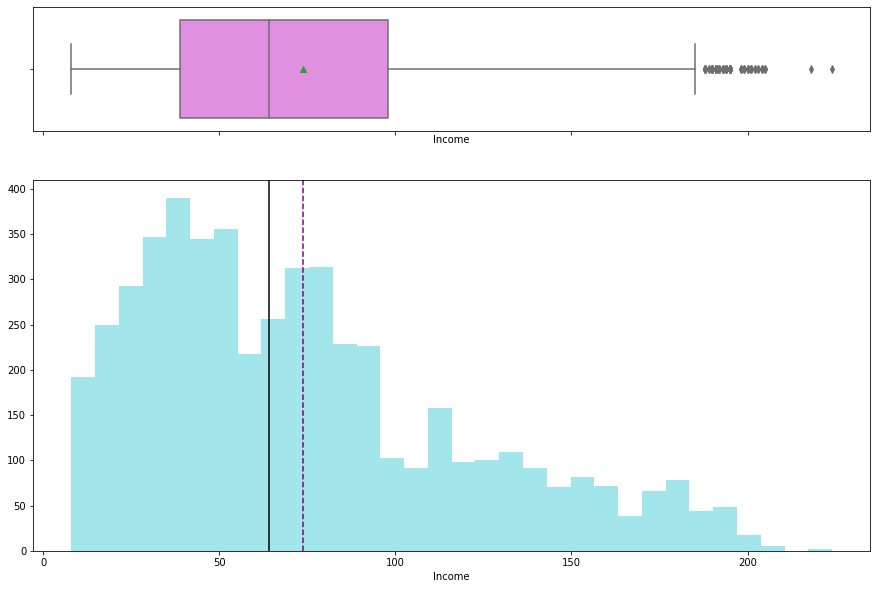

In [19]:
histogram_boxplot(data['Income'])

* The distribution of Income is skewed to right.
* Some customers have an Income above 200k dollars.
* 50% of the customers have income less than 64k dollars.

### Observations on CCAvg

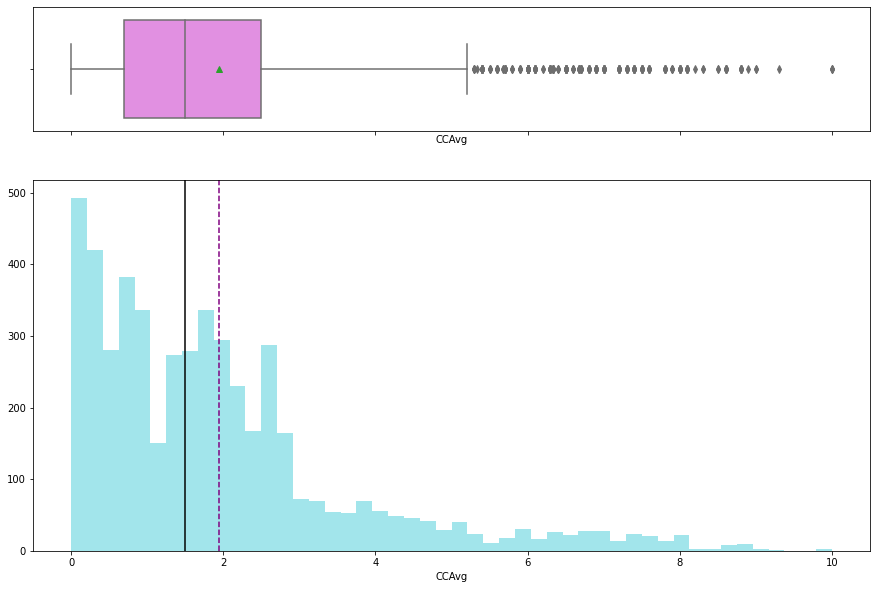

In [20]:
histogram_boxplot(data['CCAvg'])

* The distribution of CCAvg is skewed to the right and there are many outliers.
* 50% of the customers have CCAvg less than 1.5.
* We should check if the customers who spend more monthly are inclined toward taking a loan or not.

### Observations on Mortgage

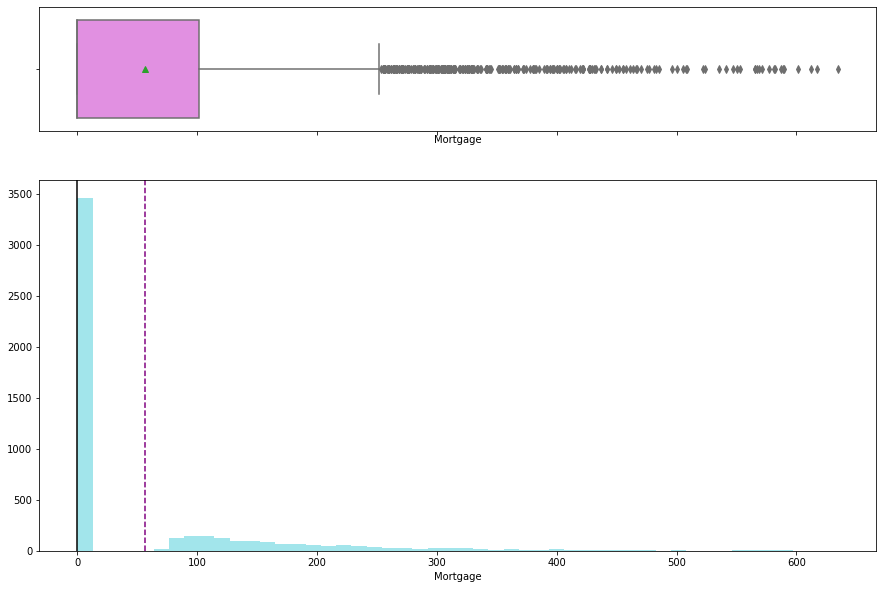

In [21]:
histogram_boxplot(data['Mortgage'])

* Most customers have not mortgaged their house but there are many outliers.
* Some customers have a mortgage house value of more than 600k dollars.
* Such customers can be potential customers who require a personal loan.

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Family

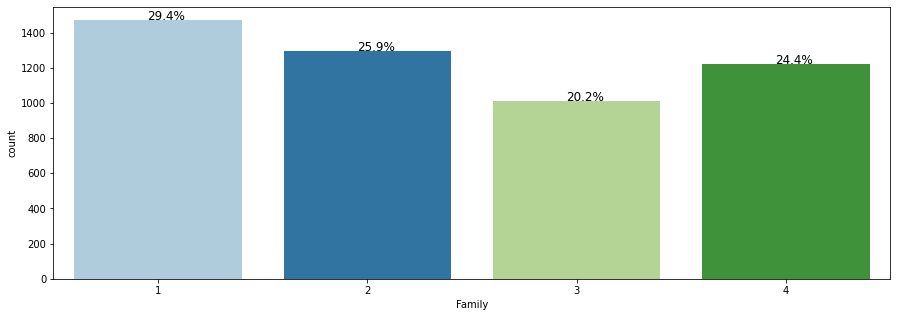

In [23]:
perc_on_bar('Family')

* Most of the customers are single/live alone (~30%).
* Second most are the ones with one dependent on them (25.9%).

### Observations on Education

In [24]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional

In [25]:
data['Education'].replace(1,'Undergraduate',inplace=True)
data['Education'].replace(2,'Graduate',inplace=True)
data['Education'].replace(3,'Professional',inplace=True)

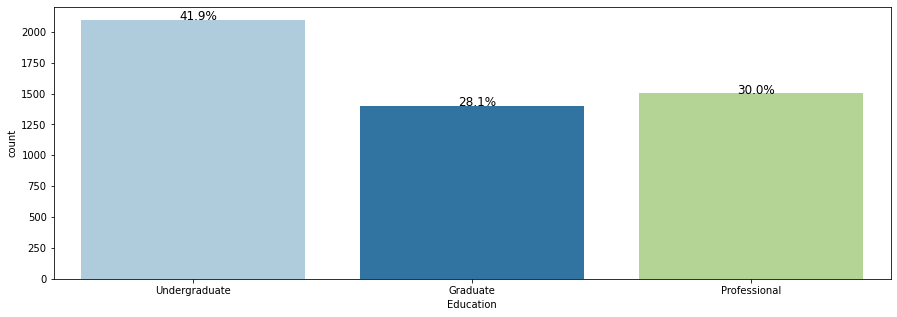

In [26]:
perc_on_bar('Education')

* Most of the customers are undergraduate (41.9%), followed by customers who have advanced/professional education (30%).

### Observations on Securities_Account

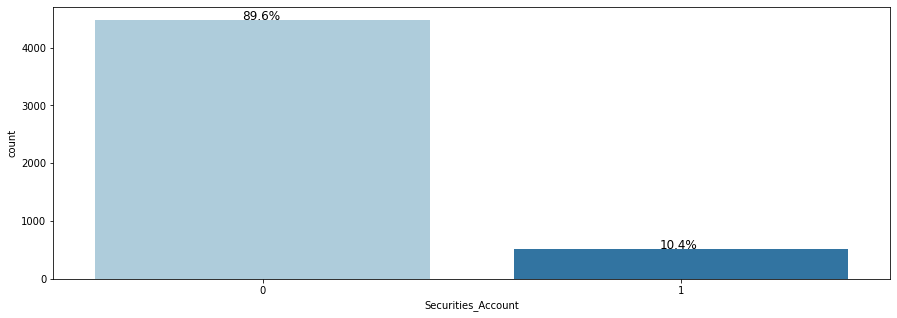

In [27]:
perc_on_bar('Securities_Account')

* 89% of the customers do not have securities account.

### Observations on CD_Account

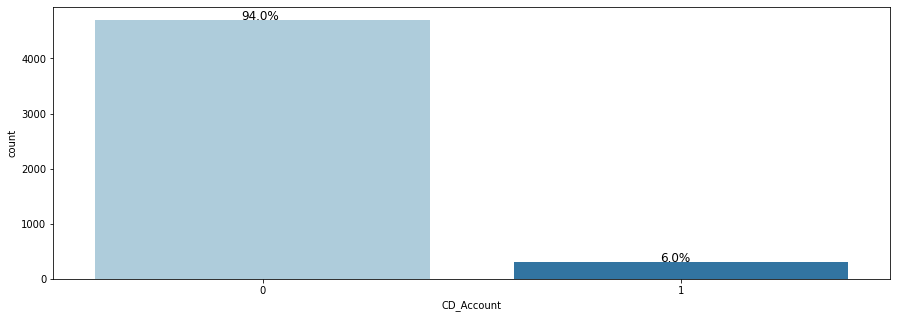

In [28]:
perc_on_bar('CD_Account')

* 94% of the customers do not have a certificate of deposit (CD_Account) with the bank.

### Observations on Online

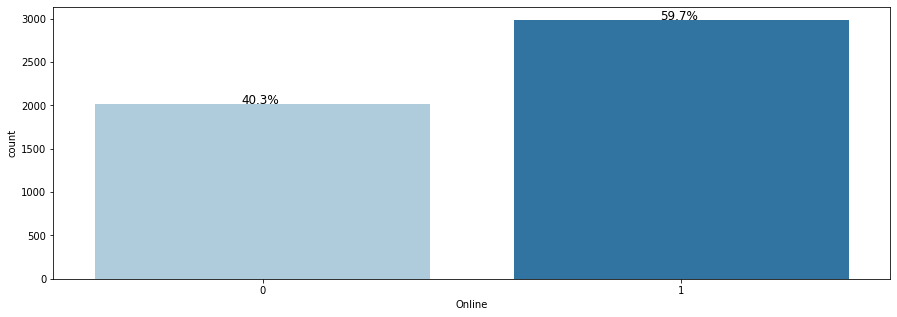

In [29]:
perc_on_bar('Online')

* Approximately 60% of the customers use internet banking facilities.

### Observation on CreditCard

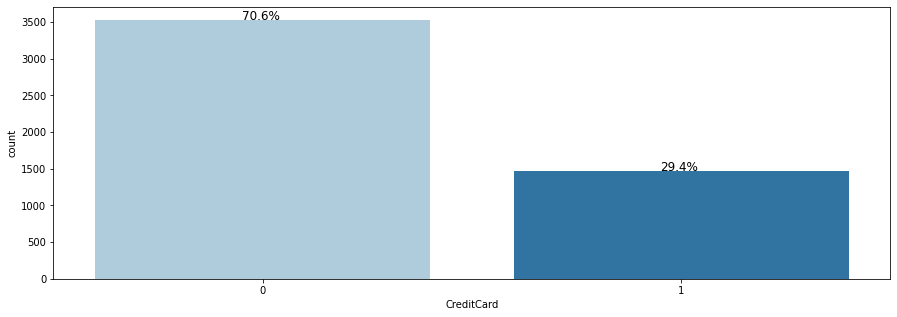

In [30]:
perc_on_bar('CreditCard')

* Approximately 70% of customers do not have a credit card issued by any other bank.

### Observation on ZIPCode

In [31]:
# checking the number of uniques in the zip code
data['ZIPCode'].nunique()

467

* There are 467 unique values in zip code.
* In US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
* Let's try to group them on the basis of first 2 digits to reduce the number of unique values in ZIPCode column.

In [32]:
data['ZIPCode'] = data['ZIPCode'].astype(str)
print("Number of unique values if we take first two digits of ZIPCode: ",data['ZIPCode'].str[0:2].nunique())
data['ZIPCode'] = data['ZIPCode'].str[0:2]

Number of unique values if we take first two digits of ZIPCode:  7


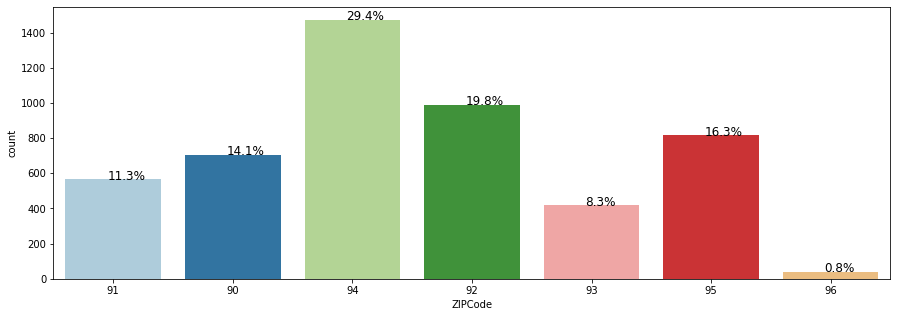

In [33]:
perc_on_bar('ZIPCode')

* All the customers are from region 9 and most from sub-region 4 followed by sub-region 2.
* This indicates that bank is located in region 9 and has customers from nearby areas.

## Bivariate Analysis

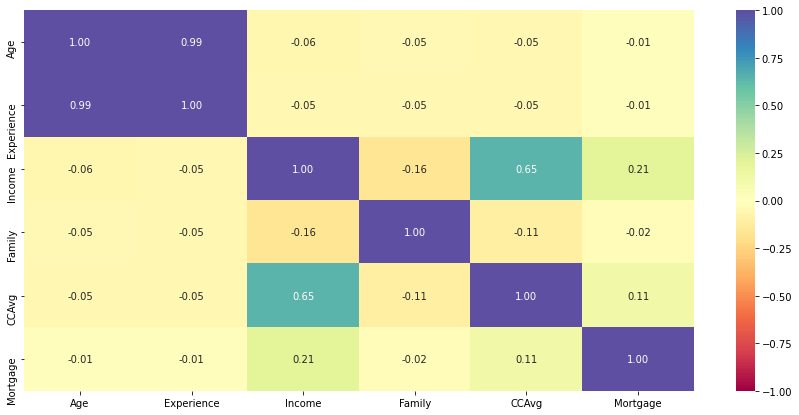

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* Age and Experience have a perfect correlation hence one of these variables can be dropped while model building as they will provide the same information to the model.

* Income and CCAvg has a moderate correlation which makes sense as the Income increases the spendings might also increase.

* Family has a negative correlation with Income, which is quite surprising as family size increases the income of the family decreases. But this correlation is not too strong to conclude.

In [35]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()


### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


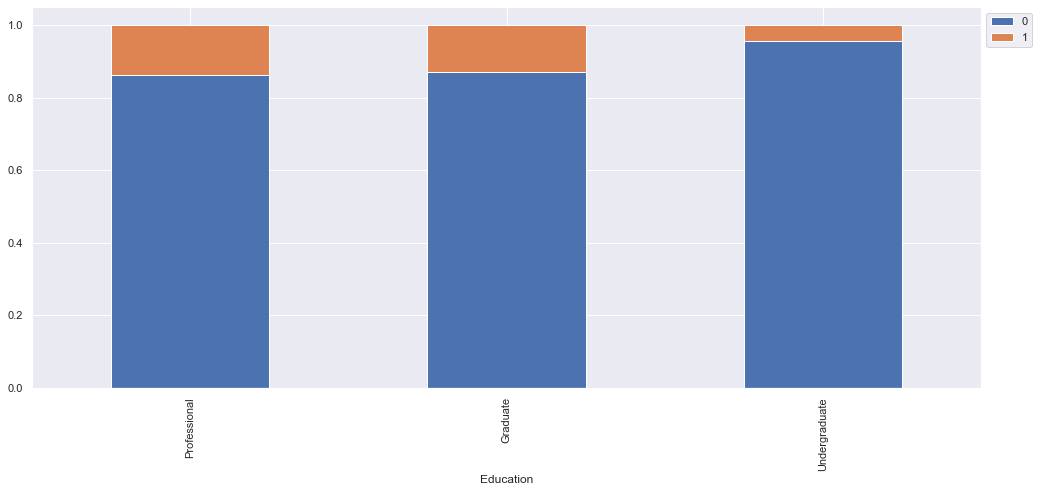

In [36]:
stacked_plot(data['Education'])

* ~15% of the customers who have done advanced/professional studies are the ones that require a personal loan.
* Undergraduates have the least requirement of personal loans.

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


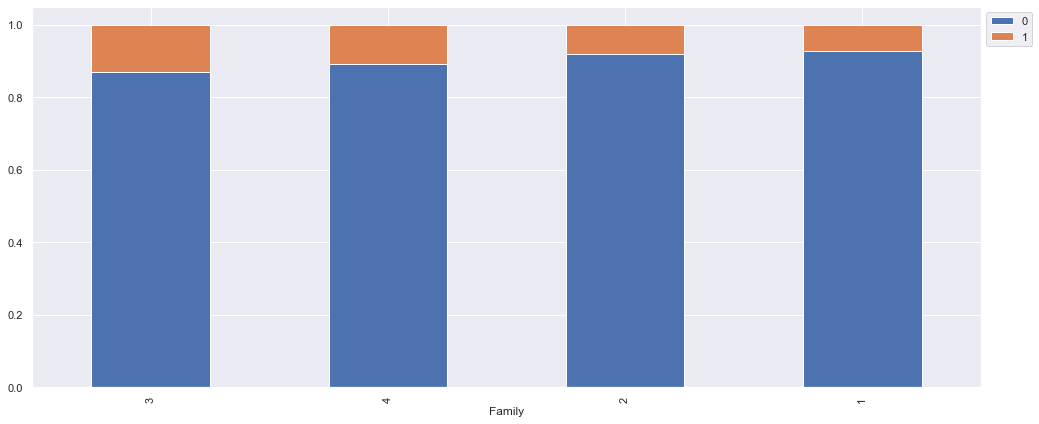

In [37]:
stacked_plot(data['Family'])

* As the family size increases the requirement of a Personal Loan also increases.
* Customers who have a family size of more than 2 are more likely to take a Personal Loan..

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


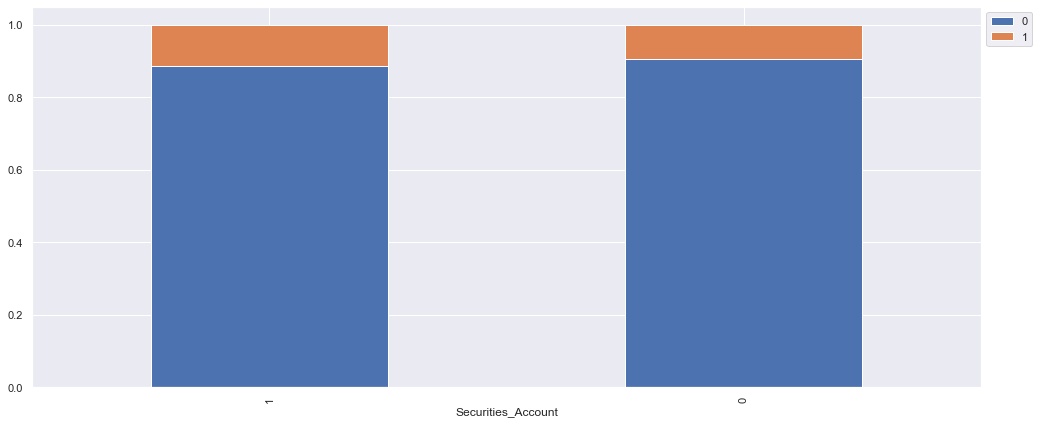

In [38]:
stacked_plot(data['Securities_Account'])

* There's not much difference between the customers who do or do not have a Security Account and require a Personal Loan.

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


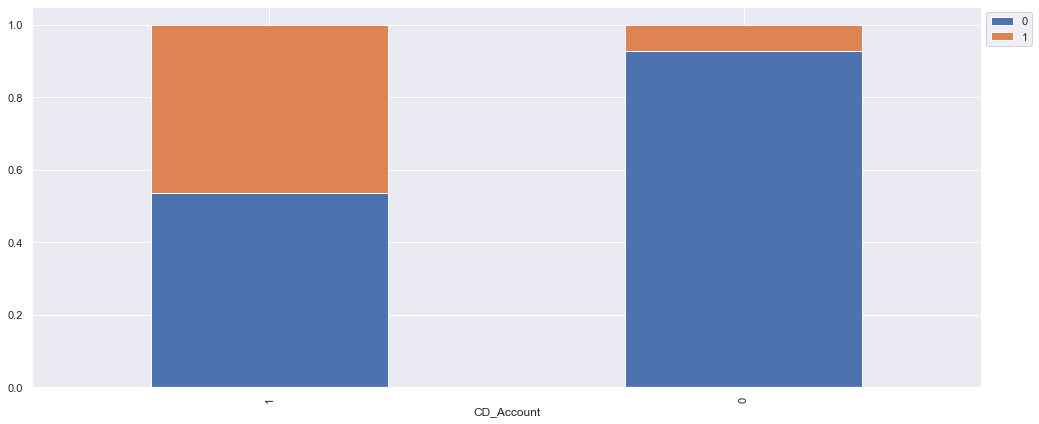

In [39]:
stacked_plot(data['CD_Account'])

* ~50% of the customers who have a certificate of deposit with the bank (CD_Account) are the ones that have the requirement of a Personal Loan.
* This can be one of the significant predictors of Personal Loan as it provides good separation between two classes.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


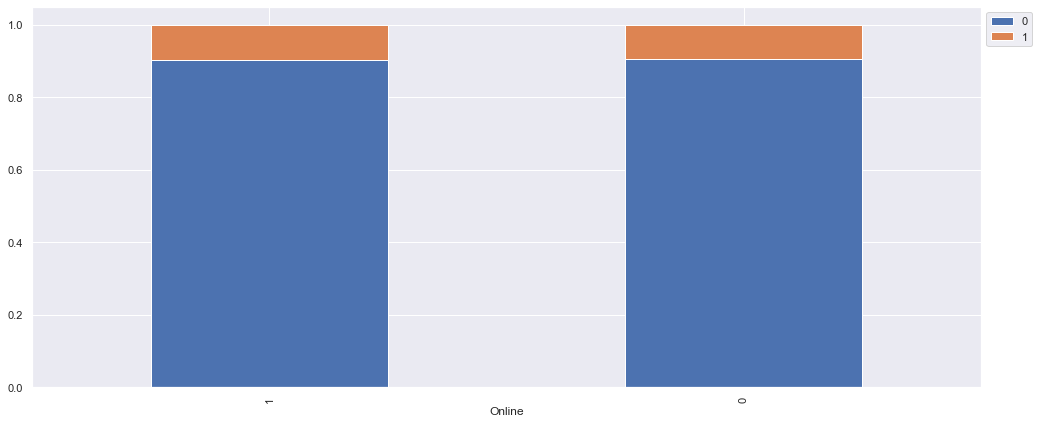

In [40]:
stacked_plot(data['Online'])

* There's not much difference between the customers who do or do use internet banking facilities and require a Personal Loan.

### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


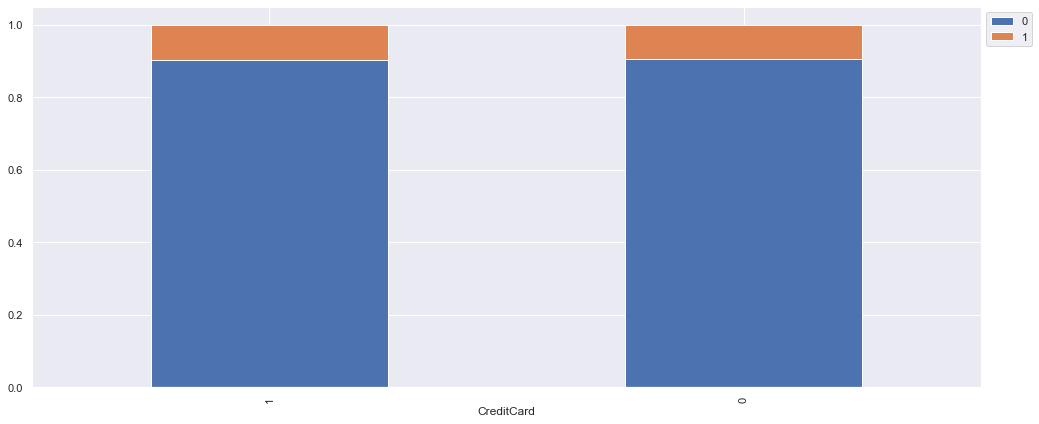

In [41]:
stacked_plot(data['CreditCard'])

* There's not much difference between the customers who do or do use a credit card from other banks and require a Personal Loan.

### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


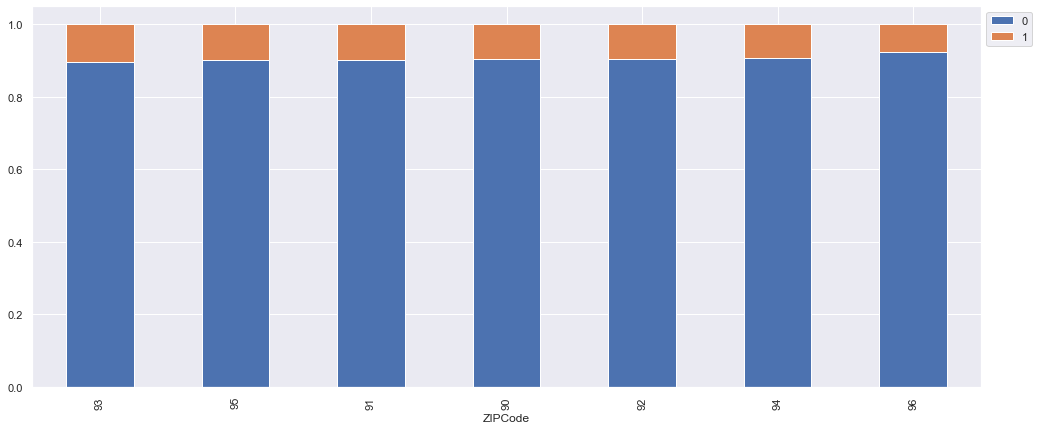

In [42]:
stacked_plot(data['ZIPCode'])

* All the sub-regions show fairly the same distribution/ requirement of a Personal Loan.

In [43]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Personal_Loan'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of a customer who requires a Personal Loan')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title("Distribution of a customer who doesn't require a Personal Loan")
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Personal Loan')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Personal Loan - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

### Personal Loan vs Age

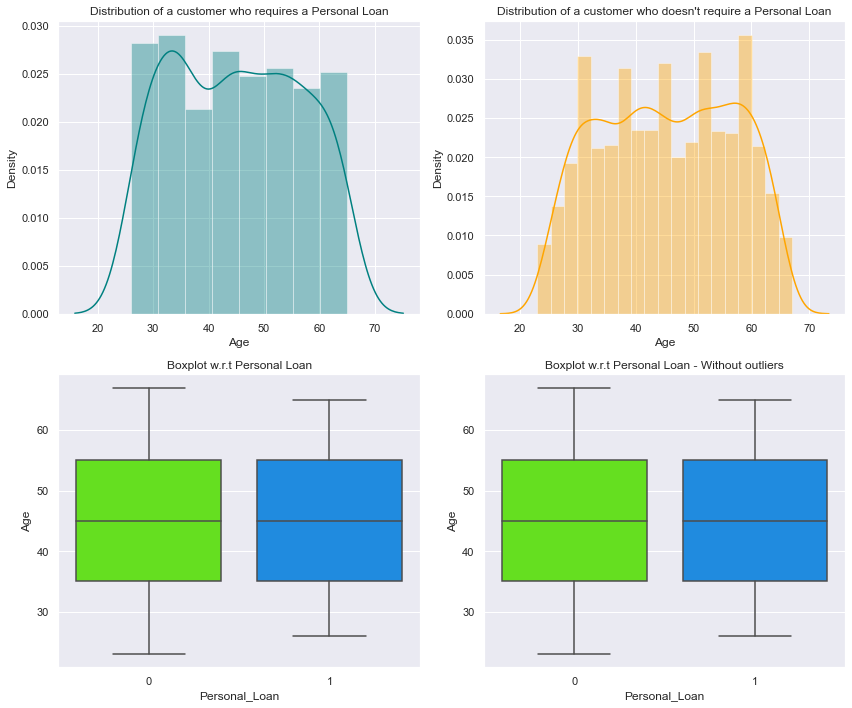

In [44]:
plot('Age')

* The customers who have the requirement of a Personal Loan have a wider range than the ones who do not require a Personal Loan.

### Personal Loan vs Experience

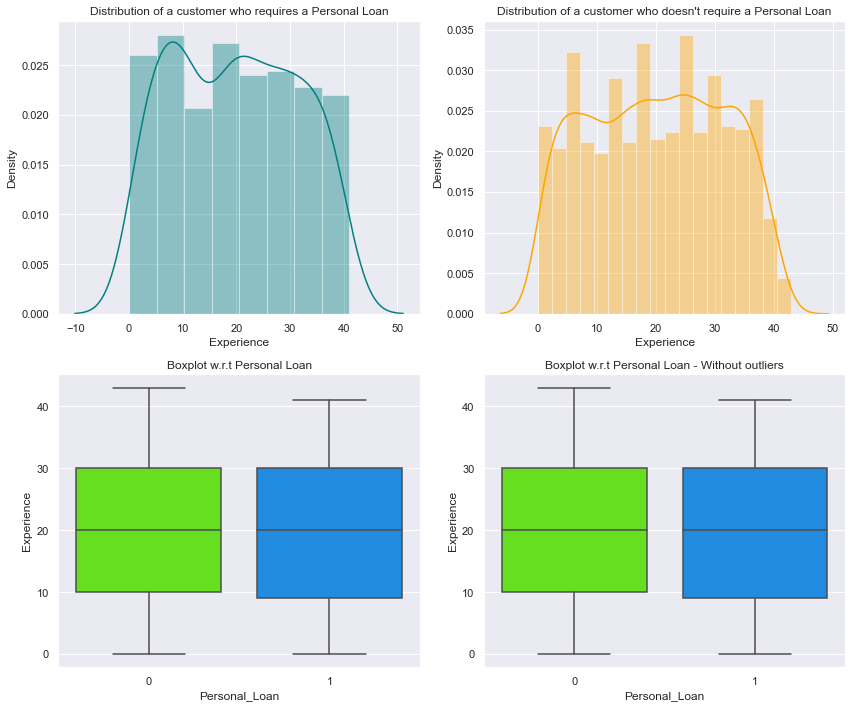

In [45]:
plot('Experience')

* There's no difference in the years of experience of customers who took Personal Loan and those who did not.

### Personal Loan vs Income

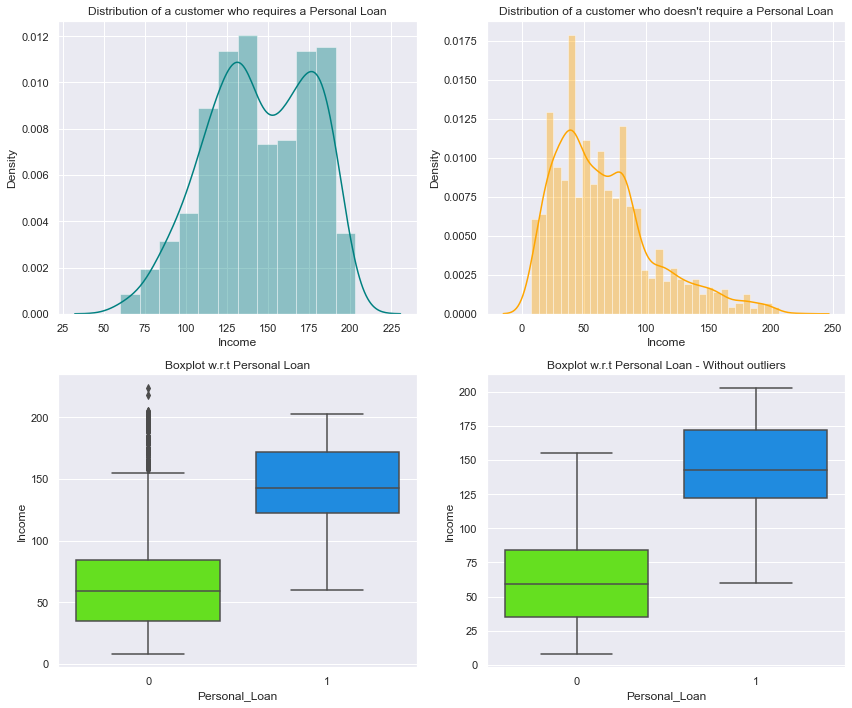

In [46]:
plot('Income')

* Those customers who have an income higher than 90k-100k dollars are the potential customers who will take the Personal Loan.
* Income seems to be a significant predictor as it provides good separation between two classes.

### Personal Loan vs CCAvg

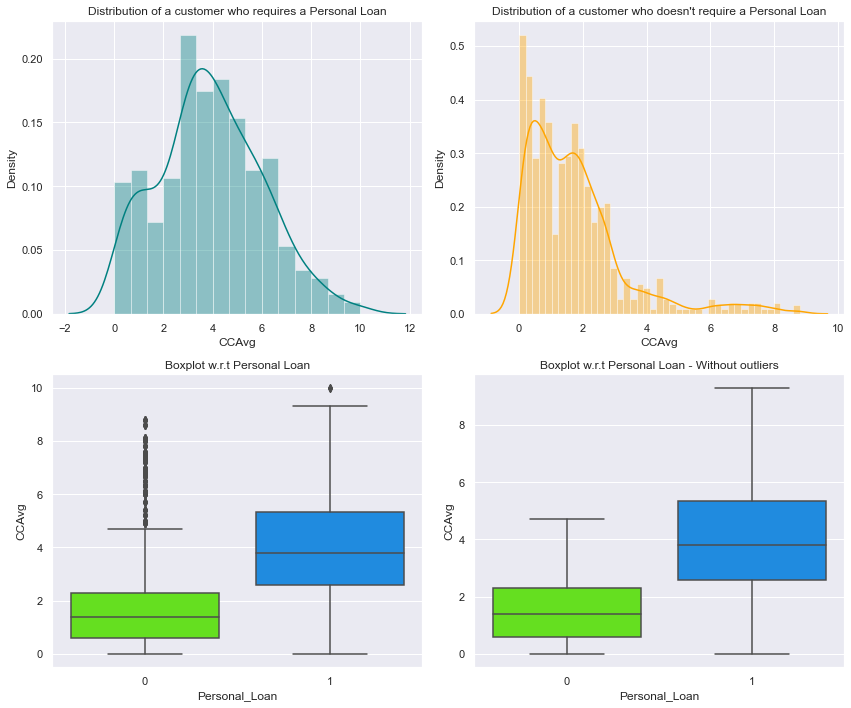

In [47]:
plot('CCAvg')

* The customers with a CCAvg of greater than 5 can be the potential customers who opt for Personal Loan.

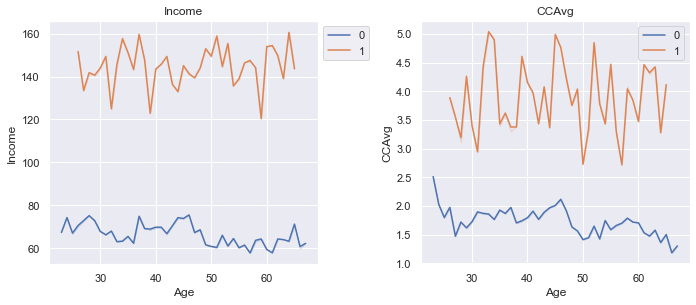

In [48]:
cols = data[['Income','CCAvg']].columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['Age'],data[variable],hue=data['Personal_Loan'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
                     plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* Customers who require Personal Loans are the ones whose income fluctuates largely with the increase in Age and - This clearly shows how financial stability plays a big part in the requirement of Loan.
Customers whose income fluctuates largely with the age i.e. have less income stability are more likely to take a personal loan.

* We can observe a similar pattern like income w.r.t Avg.

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [49]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [50]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

### Data Preparation

* We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies
* So we will only make dummies for ZIPCode and Education.

In [51]:
data["ZIPCode"] = data["ZIPCode"].astype('category')

X = data.drop(['Personal_Loan'], axis=1)
Y = data[['Personal_Loan']] 

X = pd.get_dummies(X, columns=['ZIPCode','Education'],drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take the personal loan and the customer doesn't take the loan - Loss of opportunity
2. Predicting a customer will not take the personal loan and the customer takes the loan - Loss of resources

### Which case is more important? 
* Predicting a customer will not take the personal loan and the customer takes the loan

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [52]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [53]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

### Let's build model using Statsmodels

### Before making the model, first let's check if our variables has multicollinearity

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [54]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [55]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                     446.466324
Age                        89.506233
Experience                 89.401909
Income                      1.869982
Family                      1.049174
CCAvg                       1.728581
Mortgage                    1.052176
Securities_Account          1.137160
CD_Account                  1.331364
Online                      1.040830
CreditCard                  1.109059
ZIPCode_91                  1.602055
ZIPCode_92                  1.932504
ZIPCode_93                  1.462998
ZIPCode_94                  2.190342
ZIPCode_95                  1.813757
ZIPCode_96                  1.050574
Education_Graduate          1.286593
Education_Professional      1.326988
dtype: float64



* Age and Experience seems to be highly correlated, so we will drop one of them depending on which has less effect on making predictions.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)

Accuracy on training set :  0.9577142857142857
Accuracy on test set :  0.952
Recall on training set :  0.6525679758308157
Recall on test set :  0.5973154362416108
Precision on training set :  0.8674698795180723
Precision on test set :  0.8811881188118812


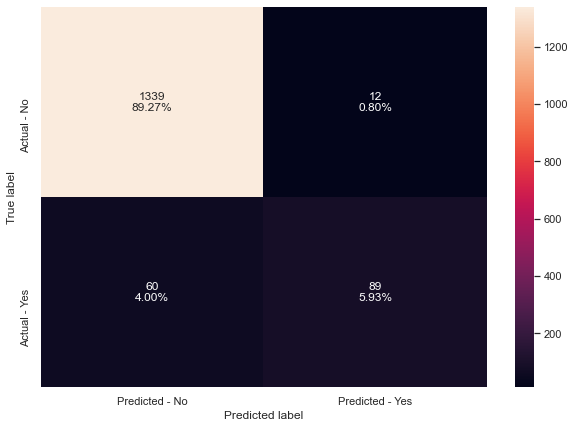

In [57]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

* Dropping Age

Accuracy on training set :  0.9571428571428572
Accuracy on test set :  0.9566666666666667
Recall on training set :  0.6374622356495468
Recall on test set :  0.6375838926174496
Precision on training set :  0.8755186721991701
Precision on test set :  0.8962264150943396


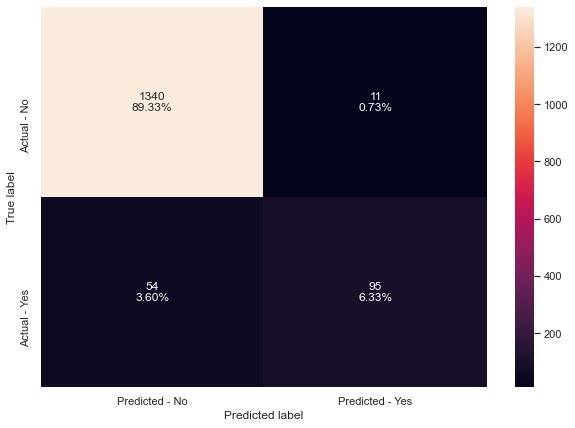

In [58]:
X_train1 = X_train.drop('Age', axis = 1)
X_test1 = X_test.drop('Age', axis = 1)

lg1 = model.fit(X_train1,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg1,X_train1,X_test1,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg1,X_test1,y_test)

* Dropping Experience

Accuracy on training set :  0.9568571428571429
Accuracy on test set :  0.9553333333333334
Recall on training set :  0.6344410876132931
Recall on test set :  0.6241610738255033
Precision on training set :  0.875
Precision on test set :  0.8942307692307693


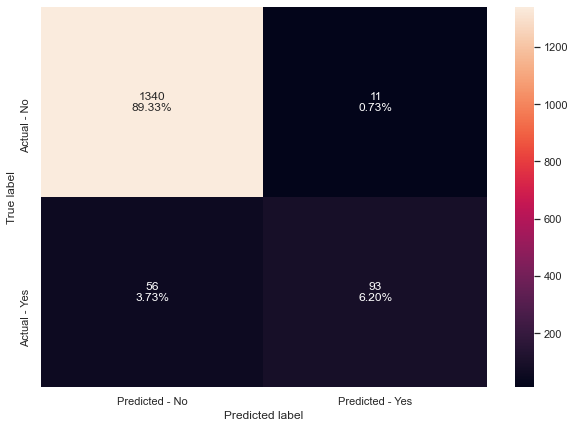

In [59]:
X_train2 = X_train.drop('Experience', axis = 1)
X_test2 = X_test.drop('Experience', axis = 1)

lg2 = model.fit(X_train2,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg2,X_train2,X_test2,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg1,X_test2,y_test)

* The performance of lg1 and lg2 is the same so we can choose either of these models
* Let's proceed with `lg1` i.e. dropping Age variable and keeping the Experience variable

### Let's check VIF score again

In [60]:
num_feature_set = num_feature_set.drop(['Age'], axis = 1)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                     23.598129
Experience                 1.008930
Income                     1.865699
Family                     1.048279
CCAvg                      1.725342
Mortgage                   1.052163
Securities_Account         1.136989
CD_Account                 1.330928
Online                     1.040797
CreditCard                 1.109054
ZIPCode_91                 1.601994
ZIPCode_92                 1.932226
ZIPCode_93                 1.462996
ZIPCode_94                 2.190325
ZIPCode_95                 1.813739
ZIPCode_96                 1.050372
Education_Graduate         1.271449
Education_Professional     1.248944
dtype: float64



* Now none of the variables have high VIF score
* Now as there is no mulyticollinearity in the data let's use `lg1` to make inferences.

### Metrics of final logistic model (lg1)

In [61]:
scores_LR = get_metrics_score(lg1,X_train1,X_test1,y_train,y_test,flag=True)

Accuracy on training set :  0.9568571428571429
Accuracy on test set :  0.956
Recall on training set :  0.6676737160120846
Recall on test set :  0.6577181208053692
Precision on training set :  0.8435114503816794
Precision on test set :  0.8672566371681416


* ROC-AUC on training set

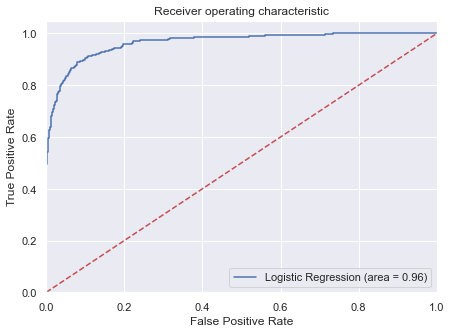

In [62]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict_proba(X_train1)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict_proba(X_train1)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

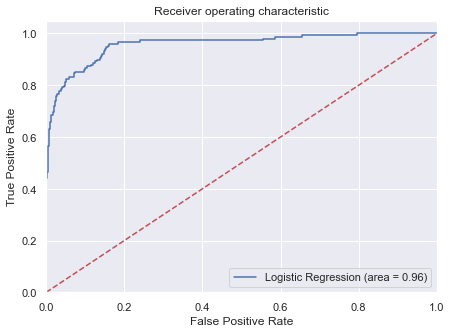

In [63]:
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict_proba(X_test1)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict_proba(X_test1)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.96 on training and test set is quite good.

### Finding the coefficients

In [64]:
log_odds = lg1.coef_[0]
pd.DataFrame(log_odds, X_train1.columns, columns=['coef']).T

const  Experience    Income    Family     CCAvg  Mortgage  \
coef -4.788684   -0.009234  0.049835  0.516952  0.147656  0.000728   

      Securities_Account  CD_Account    Online  CreditCard  ZIPCode_91  \
coef           -0.970514    3.504421 -0.719087   -1.252158   -0.701589   

      ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  \
coef   -0.304871   -0.339402   -0.547506   -0.634838   -0.186044   

      Education_Graduate  Education_Professional  
coef            2.897785                3.127363

### Coefficient interpretations

* Coefficient of Income, Family, CCAvg, Education, Mortgage and CD_Account are positive, increase in these will lead to increase in chances of taking a personal loan 
* Coefficient of Experience,Online, CreditCard, Securities_Account and ZIPCode is negative, increase in these will lead to decrease in chances of taking a personal loan

###  Converting coefficients to odds

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [65]:
odds = np.exp(np.abs(lg1.coef_[0]))-1
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train1.columns, columns=['odds']).T

const  Experience    Income    Family     CCAvg  Mortgage  \
odds  119.143124    0.009276  0.051098  0.676908  0.159114  0.000728   

      Securities_Account  CD_Account    Online  CreditCard  ZIPCode_91  \
odds            1.639299   32.262193  1.052559    2.497883    1.016955   

      ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  \
odds    0.356451    0.404108    0.728936    0.886716    0.204476   

      Education_Graduate  Education_Professional  
odds           17.133938               21.813733

### Coefficient interpretations

* CCAvg: 1 unit change in CCAvg will change the odds of taking a personal loan by 15.9%
* Income: 1 unit change in Income will change the odds of taking a personal loan by 5.1%
* Family: 1 unit change in the Family will change the odds of taking a personal loan by 67.69%
* The odds of a customer who prefers internet banking facilities taking a personal loan is 105.2% less than the customer who doesn't use internet banking facilities.
* The odds of a customer from ZIPCode_91 are 101.6% less than the customer from ZIPCode_90. Similarly, the odds of a customer from ZIPCode_91 are 35.6% less than the customer from ZIPCode_90. Interpretation of other ZIPCodes can be done in the same way keeping ZIPCode_90 as the reference.
* Education and CD_Account have greater coefficients, so small changes in their value will have a bigger change in chances of taking a personal loan.

`Interpretation for other attributes can be made similarly.`

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [66]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg1.predict_proba(X_test1)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.06472596193242665


In [67]:
# Model prediction with optimal threshold

pred_train_opt = (lg1.predict_proba(X_train1)[:,1]>optimal_threshold)
pred_test_opt = (lg1.predict_proba(X_test1)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.8325714285714285
Accuracy on test data: 0.8506666666666667
Recall on train data: 0.9425981873111783
Recall on test data: 0.9530201342281879
Precision on train data: 0.35494880546075086
Precision on test data: 0.3955431754874652
ROC-AUC Score on train data: 0.881838696053822
ROC-AUC Score on test data: 0.8961991862850783


* Recall increased from on the test set as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing but the Precision will decrease, but that's not right because it will lead to loss of resources, we need to choose an optimal balance between recall and precision.
* Area under the curve is has decreased as compared to the initial model.

#### Let's use Precision-Recall curve and see if we can find a better threshold

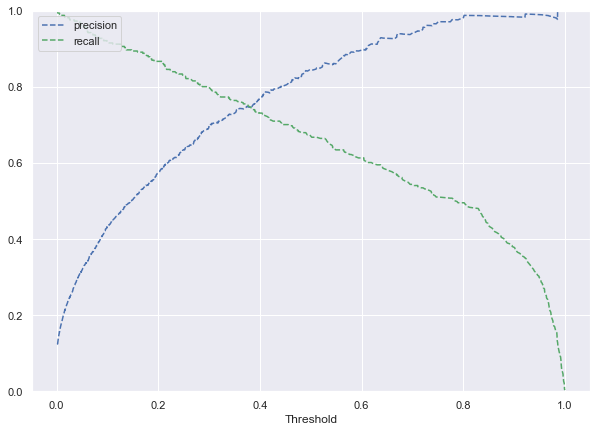

In [68]:
y_scores=lg1.predict_proba(X_train1)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.30 threshold we get a higher recall and a good precision.

In [69]:
optimal_threshold = 0.30

# Model prediction with optimal threshold
pred_train_opt = (lg1.predict_proba(X_train1)[:,1]>optimal_threshold)
pred_test_opt = (lg1.predict_proba(X_test1)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9488571428571428
Accuracy on test data: 0.9493333333333334
Recall on train data: 0.797583081570997
Recall on test data: 0.7651006711409396
Precision on train data: 0.7021276595744681
Precision on test data: 0.7354838709677419
ROC-AUC Score on train data: 0.8811203511357667
ROC-AUC Score on test data: 0.8673763903447111


* Model is performing well on training and test set.
* Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.
* Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

# Decision Trees

## Split data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [71]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

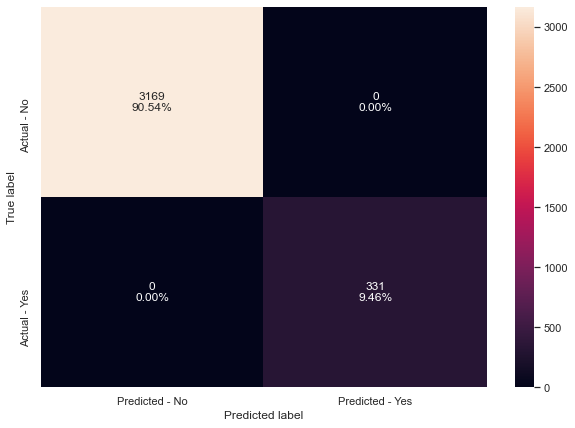

In [72]:
# let us make confusion matrix on train set
make_confusion_matrix(dTree,X_train,y_train)

* 0 errors on train data, each sample has been classified correctly

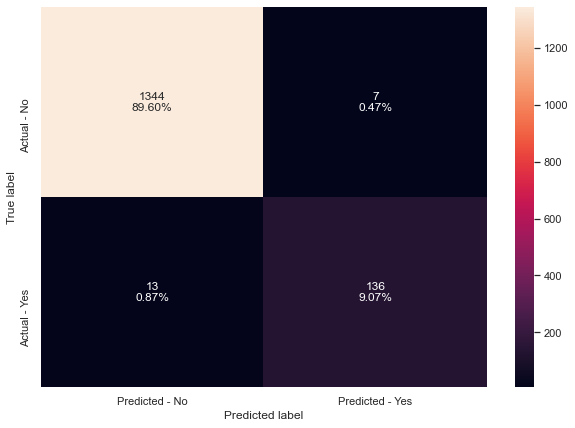

In [73]:
# let us make confusion matrix on test set
make_confusion_matrix(dTree,X_test,y_test)

In [74]:
# Let's check model performances for this model
score_DT = get_metrics_score(dTree,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9866666666666667
Recall on training set :  1.0
Recall on test set :  0.912751677852349
Precision on training set :  1.0
Precision on test set :  0.951048951048951


* Model has performed very well on training and test set.
* There's slight overfitting in terms of recall, let's see if pruning methods can help in improving the metrics. 
* Area under the curve is also 0.95 is quite good.

## Visualizing the Decision Tree

In [75]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Graduate', 'Education_Professional']


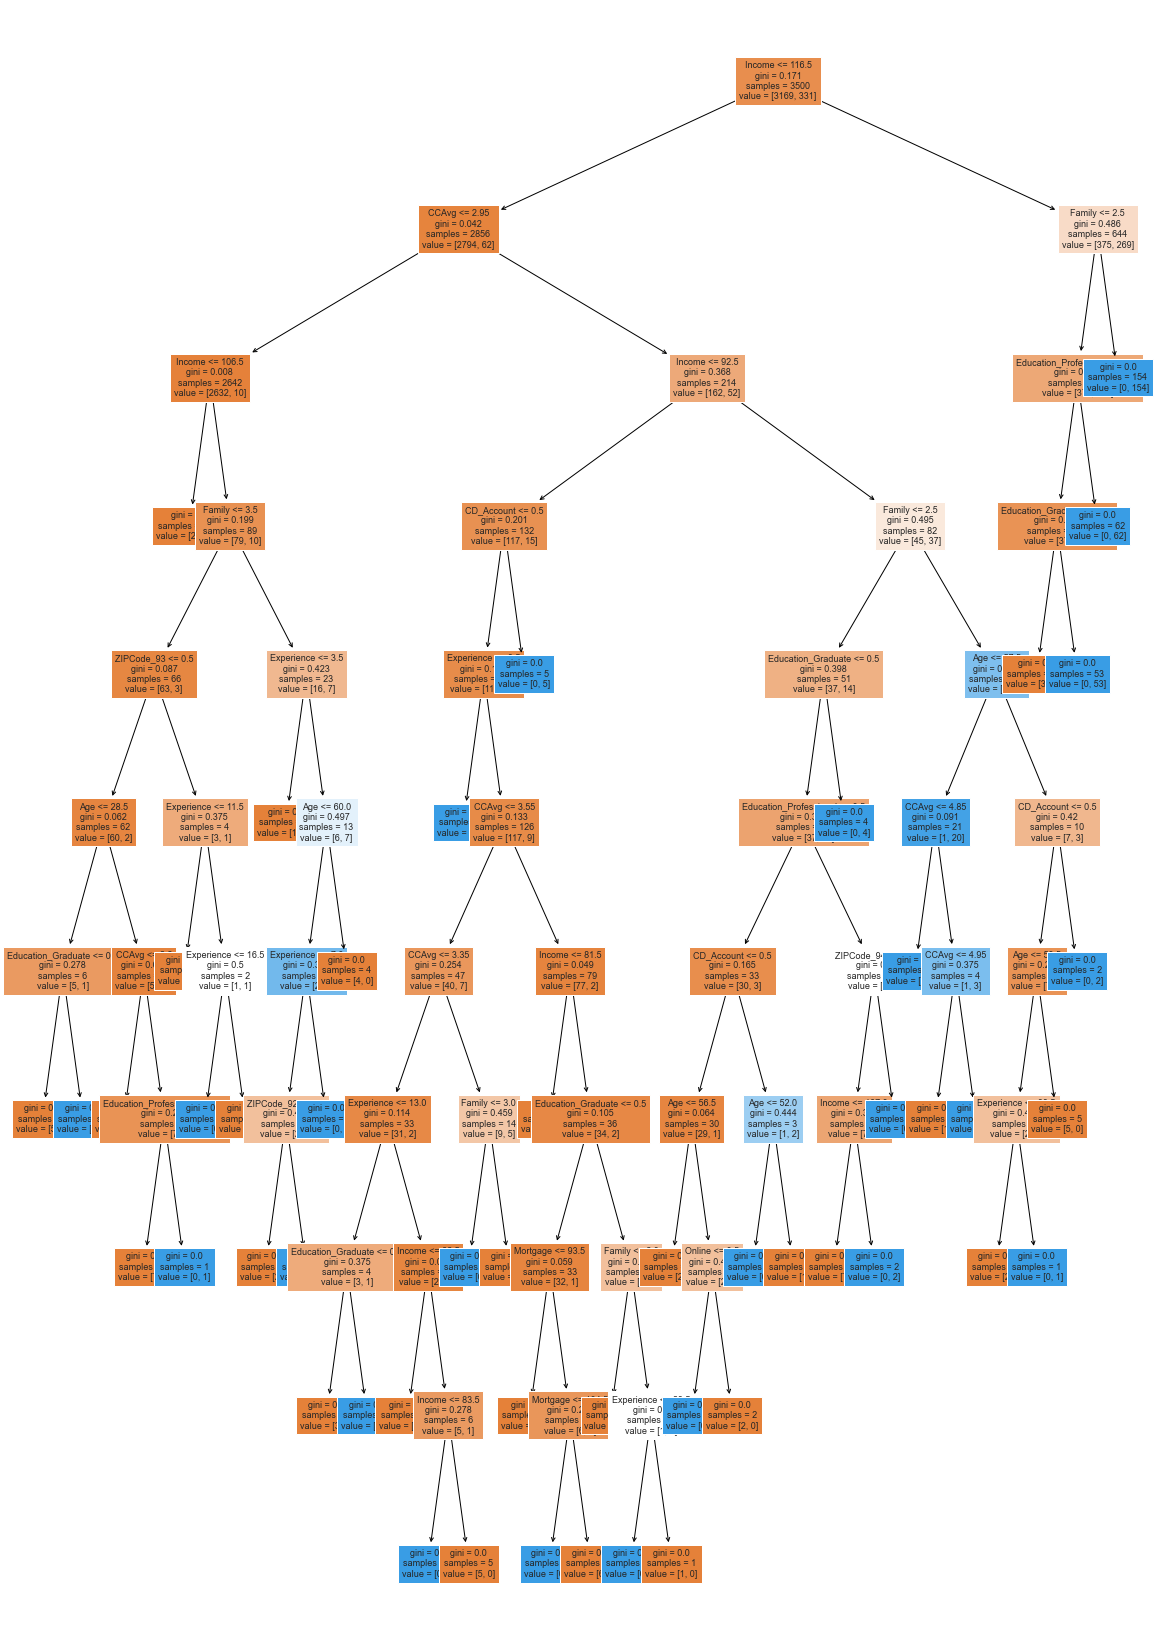

In [76]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income                  0.306430
Family                  0.258143
Education_Graduate      0.168695
Education_Professional  0.147127
CCAvg                   0.045718
CD_Account              0.021361
Age                     0.019531
Experience              0.018229
ZIPCode_94              0.006488
Mortgage                0.003236
Online                  0.002224
ZIPCode_92              0.002224
ZIPCode_93              0.000594
Securities_Account      0.000000
ZIPCode_91              0.000000
ZIPCode_95              0.000000
ZIPCode_96              0.000000
CreditCard              0.000000


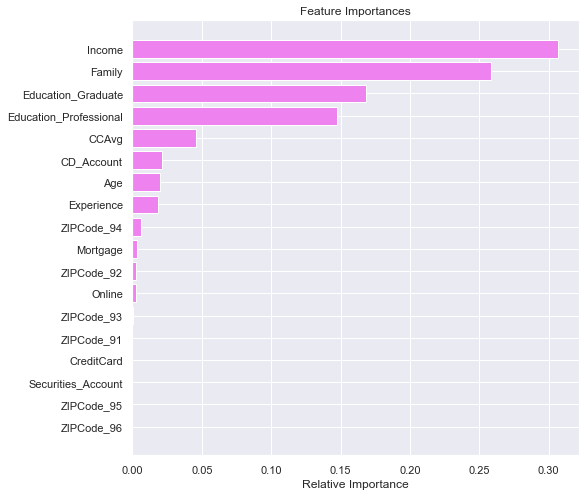

In [79]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations

* Online, CreditCard, Securities_Account, ZIPCode have very little importance, Income is most important followed by Family and Education
* People with Income less than 116.5k dollars, CCAvg less than 2.95, and Income less than 106.5k dollars have fewer chances of taking a Personal Loan.
* But people having income more than 106.5, Family not of size 4, age less than 28.50 and Experience greater than 3.50 have more chances of taking a loan.
* People with Income greater than 116.5, are undergraduate, have a family size less than 2 have fewer chances of buying a loan while People with a family size greater than 2, and education level more than undergraduate has more chances of buying a loan.
* So bank should campaign more on people with higher income, More education, and larger family sizes

## Reducing overfitting (Regularization)

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting

### Let's try Grid search
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in then
hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Gridsearch
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [80]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(6,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

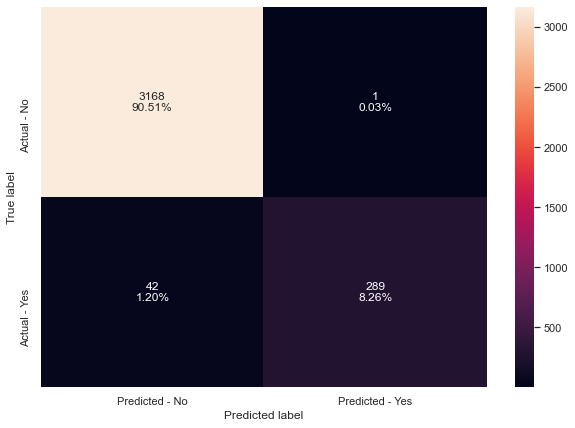

In [81]:
# let us make confusion matrix on train set
make_confusion_matrix(estimator,X_train,y_train)

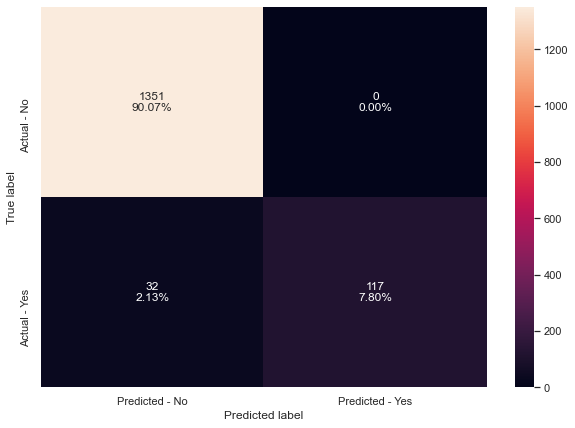

In [82]:
# let us make confusion matrix on test set
make_confusion_matrix(estimator,X_test,y_test)

In [83]:
# Let's check model performances for this model
scores_DT = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.9877142857142858
Accuracy on test set :  0.9786666666666667
Recall on training set :  0.8731117824773413
Recall on test set :  0.785234899328859
Precision on training set :  0.996551724137931
Precision on test set :  1.0


* The model is performing good but recall has reduced on training and test set.

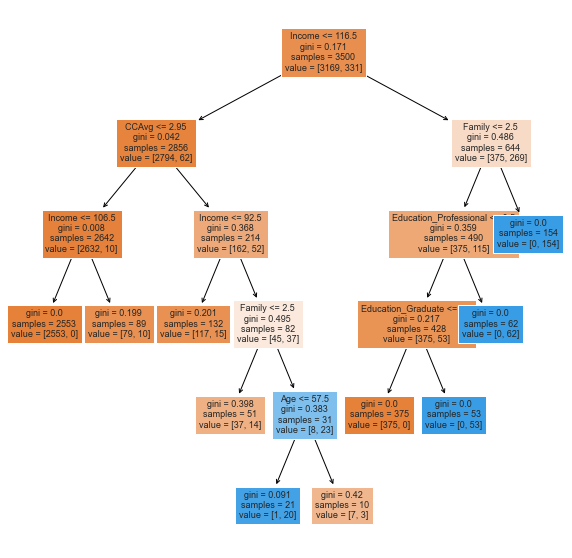

In [84]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [85]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_Professional <= 0.50
|   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_Professional >  0.50
|   |   |   |--- weights: [0.00, 6

In [86]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income                  0.306430
Family                  0.258143
Education_Graduate      0.168695
Education_Professional  0.147127
CCAvg                   0.045718
CD_Account              0.021361
Age                     0.019531
Experience              0.018229
ZIPCode_94              0.006488
Mortgage                0.003236
Online                  0.002224
ZIPCode_92              0.002224
ZIPCode_93              0.000594
Securities_Account      0.000000
ZIPCode_91              0.000000
ZIPCode_95              0.000000
ZIPCode_96              0.000000
CreditCard              0.000000


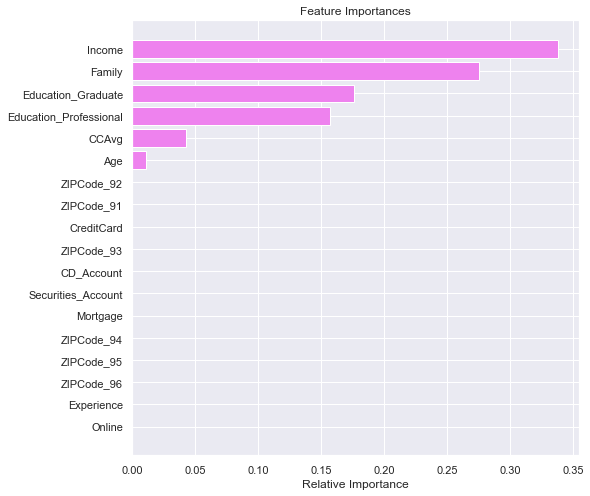

In [87]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Decision tree after pre-pruning has given similar performance, feature importance and decision rules.

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

In [88]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [89]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000186    0.001114
2     0.000214    0.001542
3     0.000242    0.002750
4     0.000250    0.003250
5     0.000268    0.004324
6     0.000272    0.004868
7     0.000276    0.005420
8     0.000381    0.005801
9     0.000381    0.006182
10    0.000508    0.006690
11    0.000625    0.007315
12    0.000700    0.008015
13    0.000769    0.011092
14    0.000792    0.014260
15    0.000889    0.015149
16    0.001026    0.017200
17    0.001305    0.018505
18    0.001647    0.020153
19    0.002333    0.022486
20    0.002407    0.024893
21    0.003294    0.028187
22    0.006473    0.034659
23    0.025146    0.084951
24    0.039216    0.124167
25    0.047088    0.171255

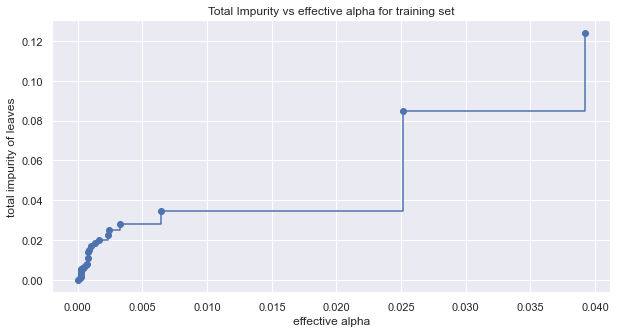

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [91]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

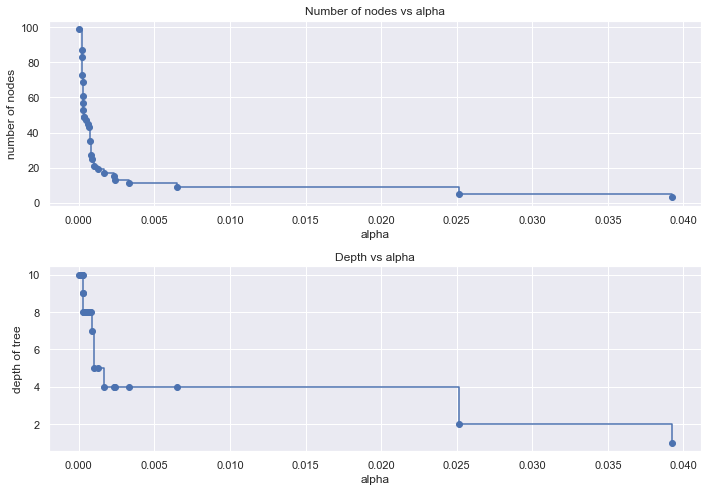

In [92]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training Recall and 90% testing Recall. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [93]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
    
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

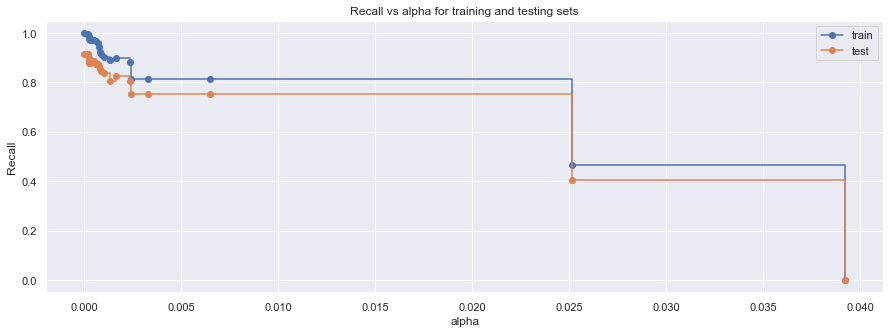

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [95]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


* Post-pruning using ccp alpha returns the same model as initial model(Tree with no pruning).
* As post pruning model is same as the initial decision tree mode, the performance and feature importances will also be the same.

### Comparing Model Performance 

In [96]:
# defining list of model
models = [lg1]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train1,X_test1,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [97]:
# defining list of model
models = [dTree,estimator,best_model]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [98]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'Decision Tree','Decision Tree(pre-pruned)','Decision Tree(post-pruned)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 


new_row = {'Model':'Logistic Regression (optimal-threshold)', 'Train_Accuracy':0.8325714285714285, 'Test_Accuracy':0.8506666666666667, 
           'Train_Recall':0.9425981873111783,'Test_Recall':0.9530201342281879,'Train_Precision':0.35494880546075086,
           'Test_Precision':0.3955431754874652}


new_row1 = {'Model':'Logistic Regression (Precisin-Recall curve threshold)', 'Train_Accuracy':0.9488571428571428, 'Test_Accuracy':0.9493333333333334, 
           'Train_Recall':0.797583081570997,'Test_Recall':0.7651006711409396,'Train_Precision':0.7021276595744681,
           'Test_Precision':0.7354838709677419}

#append rows to the dataframe
comparison_frame = comparison_frame.append(new_row, ignore_index=True)
comparison_frame = comparison_frame.append(new_row1, ignore_index=True)

comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.956857   
1                                      Decision Tree        1.000000   
2                          Decision Tree(pre-pruned)        0.987714   
3                         Decision Tree(post-pruned)        1.000000   
4            Logistic Regression (optimal-threshold)        0.832571   
5  Logistic Regression (Precisin-Recall curve thr...        0.948857   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.956000      0.667674     0.657718         0.843511        0.867257  
1       0.986667      1.000000     0.912752         1.000000        0.951049  
2       0.978667      0.873112     0.785235         0.996552        1.000000  
3       0.986667      1.000000     0.912752         1.000000        0.951049  
4       0.850667      0.942598     0.953020         0.354949        0.395543  
5       0.949333      0.797583     0.765101         0.702128        0.735484

### Conclusion

* Overall we can see that Decision tree(with default parameters) performs better on given dataset.
* Looking at important variables on the basis of the feature importance in decision trees
    * Income, CCAvg, CD_Account, Family, Education are important attributes in predicting whether a customer will take personal loan or not.
    * From Logistic Regression model we observe that the above-mentioned attributes have a positive relation with Personal Loan.

### Business Recommendations

* We have been able to build a predictive model:

  a) that the bank can deploy to identify customers who will be interested in taking a personal loan.

  b) that the bank can use to find the key factors that will have an impact on a customer taking a personal loan or not.

* Factors that have an impact on Personal_Loan: Income, Family, Education. 

* Higher income customers should be the target customers for the bank - Customers who have income above 116k dollars and a family of more than 2, such customers have higher chances of taking personal loans.

* Higher education higher are the chances to take a loan - Customers who are more educated (education level greater than undergraduate) have a higher chance of taking a personal loan.

* Size of the family has a positive correlation with the personal loan, as the size of family increases (generally a family size of 3 or more than 3 members) have more chances of a customer taking a personal loan.

* Our analysis showed that ~50% of the customers who have the certificate of deposit with the bank (CD_Account) are the ones that have the requirement of Personal Loan - Bank should target such customers.

### Misclassification analysis
* To check whether there is any certain pattern followed by samples that are incorrectly classified by our model (dTree).

In [99]:
Y1 = dTree.predict(X) 
Y1 = Y1.reshape(5000, 1)

Y2 = np.subtract(Y.astype('int') ,Y1)

# Most of the values in Y2 are 0, only 33 values are either '1' or '-1'
# 1 says, Perosn would buy loan but model predicted he won't
# -1 says, Perosn won't buy loan but model predicted he would

#Let's concatenate this Y2 with X
data1 = pd.DataFrame(Y2)
data2 = pd.concat([X, data1], axis=1)

In [100]:
incorrect_data = data2[data2['Personal_Loan'] != 0] 

In [101]:
incorrect_data.shape

(20, 19)

* There are 20 misclassifications and all those are on test data.
* incorrect_data consists of all misclassified elements.
* Let's try to see if there is any specific pattern in these samples

In [102]:
ProfileReport(incorrect_data)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Looking at the above profile, we see that incorrectly classified people are :
* Usually between 26 and 65 age and have experience in between 2 to 40 years, with 15 and 17 uniques values.
* Income varies between 60 to 115(thousand dollars), while usual income varied from 8 to 224(thousand dollars)
* Most of the people misclassified have 0 mortgages, no Securities Account, and no CD_account, have a family size 1 or 2, and customers who do not prefer internet banking facilities.
* Based on the business rule, we derived we were able to see that usually people with income less than 116, less mortgage, family size less than 3 doesn't buy loan - There are special cases always, so some people with less income and smaller family size might also buy loan.